In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline
import math
from IPython.display import display
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)
print('Seaborn version',sns.__version__)

Numpy version 1.21.6
Pandas version 1.3.5
Seaborn version 0.11.2


In [ ]:
# Airline Passenger satisfication dataset
df_airline = pd.read_csv('Airline_Passenger_Data.csv')
df_airline.head()

,Column1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# to display all columns in the dataset
pd.options.display.max_columns = None

In [ ]:
# Function to detect missing values and duplicate records

def missing_duplicates(col):
    if col.isnull().sum().sum() == 0:
        print('There are no missing values in the dataset')
    else:
        print('There are missing values in the dataset')
        
    count = 0
    for count in col.columns:
        if col[count].isnull().sum() != 0:
            print('There are {} missing values in the feature: '.format(col[count].isnull().sum()),count)
            print('Percentage of missing values in the feature:',round(col[count].isnull().sum()/col.shape[0] * 100,3),'%')
            print('Percentage of missing values in total data points:',round(col[count].isnull().sum()/(col.shape[0]*col.shape[1]) * 100,3),'%')
            
    if col.duplicated().sum() == 0:
        print('There are no duplicate records found in the dataset')
    else:
        print('There are duplicate rows found in the dataset.','\nTotal duplicate rows:', col.duplicated.sum())

In [ ]:
# Function to check balance of the target variable and countplot
def balance_ratio(col):
    print('Balance ratio of variable in Percentage')
    print(round(col.value_counts(normalize=True) * 100,2))
    print('')
    sns.countplot(col)
    plt.title('Count plot')
    plt.show()

In [ ]:
# Fuctions to plot the graphs for countplot, histograms and boxplot

# Function to plot the graph of countplots
def countplots(col,figsize_len,figsize_wid,column):
    col = col.select_dtypes(include=['object'])
    plt.figure(figsize=(figsize_len,figsize_wid))
    a,b,c = math.ceil(col.shape[1]/column),column,1
    i = 0
    for i in col.columns:
        if col[i].dtype == 'object':
            plt.subplot(a,b,c)
            sns.countplot(x=col[i])
            c = c + 1
    plt.show()
    return

# Function to plot the graph of Histograms
def histogram(col,figsize_len,figsize_wid,column):
    col = col.select_dtypes(exclude='object')
    plt.figure(figsize=(figsize_len,figsize_wid))
    a,b,c = math.ceil(col.shape[1]/column),column,1
    i = 0
    for i in col.columns:
        if col[i].dtype != 'object':
            plt.subplot(a,b,c)
            sns.distplot(col[i])
            c = c + 1
    plt.show()
    return

# Function to plot the graph of boxplots
def boxplots(col,figsize_len,figsize_wid,column):
    col = col.select_dtypes(exclude='object')
    plt.figure(figsize=(figsize_len,figsize_wid))
    a,b,c = math.ceil(col.shape[1]/column),column,1
    i = 0
    for i in col.columns:
        if col[i].dtype != 'object':
            plt.subplot(a,b,c)
            sns.boxplot(col[i])
            c = c + 1
    plt.show()
    return

# Airline Passenger dataset

In [ ]:
# information of the data
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Column1                            129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [ ]:
# describing the data
df_airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Column1,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


In [ ]:
# we will be dropping column1 feature since they are unique values of rows
# we will be dropping customer feature since they are unique values

df_airline.drop(columns=['Column1','id'], axis=1, inplace=True)

Balance ratio of variable in Percentage
neutral or dissatisfied    56.55
satisfied                  43.45
Name: satisfaction, dtype: float64



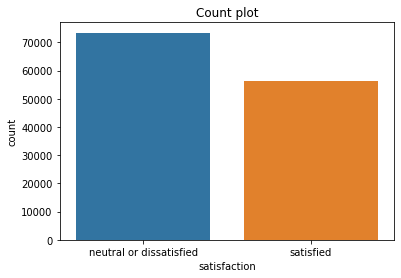

In [ ]:
# Checking the target feature balance
balance_ratio(df_airline['satisfaction'])

In [ ]:
# we will check countplots for categorical variables
# countplots(df_airline,15,12,2)

In [ ]:
#histogram(df_airline,15,18,4)

In [ ]:
#boxplots(df_airline,18,15,5)

In [ ]:
#Bivariate Analysis using heatmap
#plt.figure(figsize=(15,10))
#sns.heatmap(round(df_airline.corr(),2),annot=True,cmap='Blues')
#plt.show()

In [ ]:
# pairplot
#sns.pairplot(df_airline, corner=True)

In [ ]:
# Scatter plot with target variable
#plt.figure(figsize=(10,10))
#sns.scatterplot(x=df_airline['Departure Delay in Minutes'], y=df_airline['Arrival Delay in Minutes'],hue=df_airline['satisfaction'])
#plt.show()

In [ ]:
# Checking for missing values and duplicate records
#missing_duplicates(df_airline)

In [ ]:
# Since there are only 0.3% of missing values in "Arrival Delay in Minutes", we prefer to drop rows containing missing values
print('There are {} rows and {} columns before dropping null values:'.format(df_airline.shape[0],df_airline.shape[1]))
df_airline.dropna(axis=0, subset=['Arrival Delay in Minutes'], inplace=True)
print('There are {} rows and {} columns after dropping null values:'.format(df_airline.shape[0],df_airline.shape[1]))

There are 129880 rows and 23 columns before dropping null values:
There are 129487 rows and 23 columns after dropping null values:


In [ ]:
# Checking for missing values and duplicate records after dropping null values
missing_duplicates(df_airline)

There are no missing values in the dataset
There are no duplicate records found in the dataset


In [ ]:
# pulling column names
df_airline.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
# We will perform one hot encoding on all categorical variables.
# Drop_first is set to True in order to avoid multicolinearity and also it reduces number of features

df_airline = pd.get_dummies(data=df_airline, columns=['Gender','Customer Type','Type of Travel','Class'], drop_first=True)
df_airline.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0,0,0


In [ ]:
df_airline.shape

(129487, 24)

In [ ]:
# Function to create data imbalance
def create_imbalance(df,target_index,Perc):
    data = df.copy()
    
    # seperating independent and dependent variables
    X = data.drop(data.columns[target_index],axis=1)
    y = data.iloc[:,target_index]
    
    # creating imbalance from given percentage
    ratio1 = int(y.value_counts().sort_values(ascending=False)[0] * (Perc/100))
    ratio2 = int(y.value_counts().sort_values(ascending=False)[0]) - ratio1
    label1 = data.iloc[:,target_index].value_counts().sort_values(ascending=False).index[0]
    label2 = data.iloc[:,target_index].value_counts().sort_values(ascending=False).index[1]
    
    #making imbalance
    X_res, y_res = make_imbalance(X, y, sampling_strategy={label1:ratio1, label2:ratio2}, random_state=1)
    target_variable = data.columns[target_index]
    X_res[target_variable] = y_res
    
    return X_res

Balance ratio of variable in Percentage
neutral or dissatisfied    65.0
satisfied                  35.0
Name: satisfaction, dtype: float64



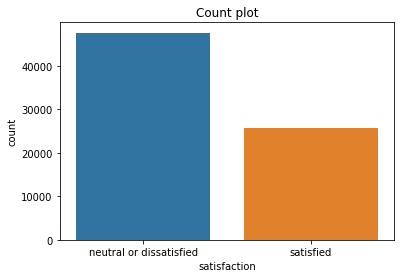

In [ ]:
# creating 65:35 imbalance ratio
df_airline_65 = create_imbalance(df_airline,18,65)
balance_ratio(df_airline_65['satisfaction'])

Balance ratio of variable in Percentage
neutral or dissatisfied    75.0
satisfied                  25.0
Name: satisfaction, dtype: float64



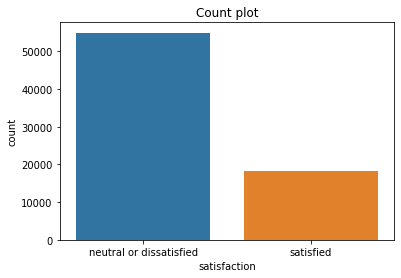

In [ ]:
# creating 75:25 imbalance ratio
df_airline_75 = create_imbalance(df_airline,18,75)
balance_ratio(df_airline_75['satisfaction'])

Balance ratio of variable in Percentage
neutral or dissatisfied    90.0
satisfied                  10.0
Name: satisfaction, dtype: float64



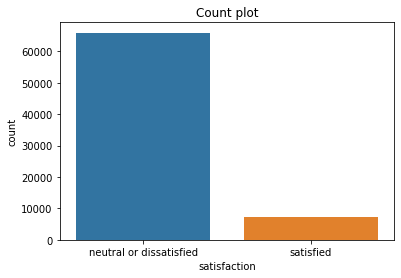

In [ ]:
# creating 90:10 imbalance ratio
df_airline_90 = create_imbalance(df_airline,18,90)
balance_ratio(df_airline_90['satisfaction'])

**Base line Model**

In [ ]:
df_airline_90.shape

(73225, 24)

In [ ]:
# grid search to find best hyper tuning parameters

# configuring min max sacling
scale_minmax = MinMaxScaler()

# seperating target and features
X = df_airline.drop(columns=['satisfaction'],axis=1)
y = df_airline['satisfaction']

X = pd.DataFrame(scale_minmax.fit_transform(X), columns=X.columns)


grid = {
    'max_features': [5,6],
    'max_depth': [4,5,6],
    'min_samples_leaf': [1000,2000], 
    'min_samples_split': [2,4],
       }

RF_Model = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = RF_Model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')
grid_search.fit(X, y)
print(grid_search.best_params_,'\n')

{'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 1000, 'min_samples_split': 2} 



In [ ]:
# configuring stratified cross validation with cv=10
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# configuring scaling
scale = StandardScaler()

Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Iteration number: 10

Train F1 score after 10 fold CV: 0.8784 +/- 0.00134
Test F1 score after 10 fold CV: 0.87829 +/- 0.00326
Train kappa after 10 fold CV: 0.79082 +/- 0.00213
Test Kappa after 10 fold CV: 0.79065 +/- 0.00535
Train Accuracy after 10 fold CV: 0.89804 +/- 0.00102
Test Accuracy after 10 fold CV: 0.89796 +/- 0.00258



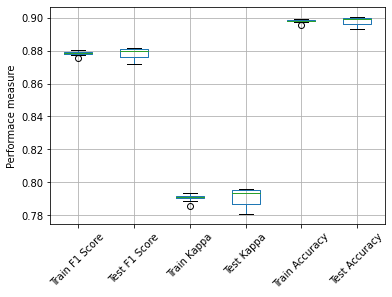

In [ ]:
# for original data

# seperating target and features
X = df_airline.drop(columns=['satisfaction'],axis=1)
y = df_airline['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
train_f1 = []
test_f1 = []
train_kappa = []
test_kappa = []
train_acc = []
test_acc = []
for train_index, test_index in skf.split(X, y):
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  x_train_fold_scale = pd.DataFrame(scale.fit_transform(x_train_fold), columns=x_train_fold.columns)
  x_test_fold_scale = pd.DataFrame(scale.transform(x_test_fold), columns=x_test_fold.columns)
  BL_Model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
  BL_Model.fit(x_train_fold_scale, y_train_fold)
  train_f1_cv = metrics.f1_score(y_train_fold, BL_Model.predict(x_train_fold_scale), pos_label='satisfied')
  test_f1_cv = metrics.f1_score(y_test_fold, BL_Model.predict(x_test_fold_scale), pos_label='satisfied')
  train_kappa_cv = metrics.cohen_kappa_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_kappa_cv = metrics.cohen_kappa_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  train_acc_cv = metrics.accuracy_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_acc_cv = metrics.accuracy_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  print('Iteration number:', iteration_no)
  train_f1 = np.append(train_f1, train_f1_cv)
  test_f1 = np.append(test_f1, test_f1_cv)
  train_kappa = np.append(train_kappa, train_kappa_cv)
  test_kappa = np.append(test_kappa, test_kappa_cv)
  train_acc = np.append(train_acc, train_acc_cv)
  test_acc = np.append(test_acc, test_acc_cv)
  iteration_no += 1
print('\nTrain F1 score after 10 fold CV:', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Test F1 score after 10 fold CV:', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
print('Train kappa after 10 fold CV:', round(train_kappa.mean(),5),'+/-', round(train_kappa.std(),5))
print('Test Kappa after 10 fold CV:', round(test_kappa.mean(),5),'+/-', round(test_kappa.std(),5))
print('Train Accuracy after 10 fold CV:', round(train_acc.mean(),5),'+/-', round(train_acc.std(),5))
print('Test Accuracy after 10 fold CV:', round(test_acc.mean(),5),'+/-', round(test_acc.std(),5))
print('')

# saving performance metrics for comparison
train_acc_BL_original = train_acc
test_acc_BL_original = test_acc
train_f1_BL_original = train_f1
test_f1_BL_original = test_f1
train_kappa_BL_original = train_kappa
test_kappa_BL_original = test_kappa

# visualising the performace metrics
visualise = {'Train F1 Score': train_f1, 'Test F1 Score': test_f1,
             'Train Kappa': train_kappa, 'Test Kappa': test_kappa,
             'Train Accuracy': train_acc, 'Test Accuracy': test_acc}
visualise = pd.DataFrame(visualise)
visualise.boxplot()
plt.ylabel('Performace measure')
plt.xticks(rotation=45)
plt.show()

Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Iteration number: 10

Train F1 score after 10 fold CV: 0.83939 +/- 0.0031
Test F1 score after 10 fold CV: 0.83865 +/- 0.00325
Train kappa after 10 fold CV: 0.76386 +/- 0.00422
Test Kappa after 10 fold CV: 0.76278 +/- 0.00495
Train Accuracy after 10 fold CV: 0.89649 +/- 0.00174
Test Accuracy after 10 fold CV: 0.89602 +/- 0.00227



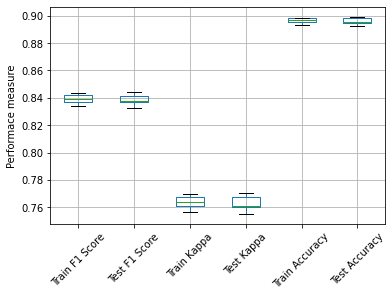

In [ ]:
# for low imbalance data

# seperating target and features
X = df_airline_65.drop(columns=['satisfaction'],axis=1)
y = df_airline_65['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
train_f1 = []
test_f1 = []
train_kappa = []
test_kappa = []
train_acc = []
test_acc = []
for train_index, test_index in skf.split(X, y):
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  x_train_fold_scale = pd.DataFrame(scale.fit_transform(x_train_fold), columns=x_train_fold.columns)
  x_test_fold_scale = pd.DataFrame(scale.transform(x_test_fold), columns=x_test_fold.columns)
  BL_Model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
  BL_Model.fit(x_train_fold_scale, y_train_fold)
  train_f1_cv = metrics.f1_score(y_train_fold, BL_Model.predict(x_train_fold_scale), pos_label='satisfied')
  test_f1_cv = metrics.f1_score(y_test_fold, BL_Model.predict(x_test_fold_scale), pos_label='satisfied')
  train_kappa_cv = metrics.cohen_kappa_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_kappa_cv = metrics.cohen_kappa_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  train_acc_cv = metrics.accuracy_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_acc_cv = metrics.accuracy_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  print('Iteration number:', iteration_no)
  train_f1 = np.append(train_f1, train_f1_cv)
  test_f1 = np.append(test_f1, test_f1_cv)
  train_kappa = np.append(train_kappa, train_kappa_cv)
  test_kappa = np.append(test_kappa, test_kappa_cv)
  train_acc = np.append(train_acc, train_acc_cv)
  test_acc = np.append(test_acc, test_acc_cv)
  iteration_no += 1
print('\nTrain F1 score after 10 fold CV:', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Test F1 score after 10 fold CV:', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
print('Train kappa after 10 fold CV:', round(train_kappa.mean(),5),'+/-', round(train_kappa.std(),5))
print('Test Kappa after 10 fold CV:', round(test_kappa.mean(),5),'+/-', round(test_kappa.std(),5))
print('Train Accuracy after 10 fold CV:', round(train_acc.mean(),5),'+/-', round(train_acc.std(),5))
print('Test Accuracy after 10 fold CV:', round(test_acc.mean(),5),'+/-', round(test_acc.std(),5))
print('')

# saving performance metrics for comparison
train_acc_BL_low = train_acc
test_acc_BL_low = test_acc
train_f1_BL_low = train_f1
test_f1_BL_low = test_f1
train_kappa_BL_low = train_kappa
test_kappa_BL_low = test_kappa

# visualising the performace metrics
visualise = {'Train F1 Score': train_f1, 'Test F1 Score': test_f1,
             'Train Kappa': train_kappa, 'Test Kappa': test_kappa,
             'Train Accuracy': train_acc, 'Test Accuracy': test_acc}
visualise = pd.DataFrame(visualise)
visualise.boxplot()
plt.ylabel('Performace measure')
plt.xticks(rotation=45)
plt.show()

Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Iteration number: 10

Train F1 score after 10 fold CV: 0.76657 +/- 0.00354
Test F1 score after 10 fold CV: 0.76536 +/- 0.00435
Train kappa after 10 fold CV: 0.70486 +/- 0.0042
Test Kappa after 10 fold CV: 0.70343 +/- 0.00542
Train Accuracy after 10 fold CV: 0.8997 +/- 0.00127
Test Accuracy after 10 fold CV: 0.89927 +/- 0.00185



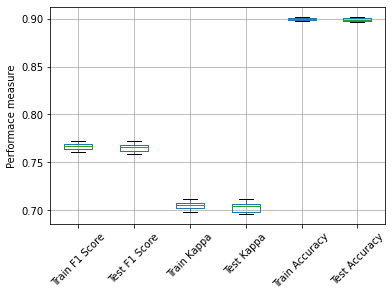

In [ ]:
# for medium imbalance data

# seperating target and features
X = df_airline_75.drop(columns=['satisfaction'],axis=1)
y = df_airline_75['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
train_f1 = []
test_f1 = []
train_kappa = []
test_kappa = []
train_acc = []
test_acc = []
for train_index, test_index in skf.split(X, y):
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  x_train_fold_scale = pd.DataFrame(scale.fit_transform(x_train_fold), columns=x_train_fold.columns)
  x_test_fold_scale = pd.DataFrame(scale.transform(x_test_fold), columns=x_test_fold.columns)
  BL_Model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
  BL_Model.fit(x_train_fold_scale, y_train_fold)
  train_f1_cv = metrics.f1_score(y_train_fold, BL_Model.predict(x_train_fold_scale), pos_label='satisfied')
  test_f1_cv = metrics.f1_score(y_test_fold, BL_Model.predict(x_test_fold_scale), pos_label='satisfied')
  train_kappa_cv = metrics.cohen_kappa_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_kappa_cv = metrics.cohen_kappa_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  train_acc_cv = metrics.accuracy_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_acc_cv = metrics.accuracy_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  print('Iteration number:', iteration_no)
  train_f1 = np.append(train_f1, train_f1_cv)
  test_f1 = np.append(test_f1, test_f1_cv)
  train_kappa = np.append(train_kappa, train_kappa_cv)
  test_kappa = np.append(test_kappa, test_kappa_cv)
  train_acc = np.append(train_acc, train_acc_cv)
  test_acc = np.append(test_acc, test_acc_cv)
  iteration_no += 1
print('\nTrain F1 score after 10 fold CV:', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Test F1 score after 10 fold CV:', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
print('Train kappa after 10 fold CV:', round(train_kappa.mean(),5),'+/-', round(train_kappa.std(),5))
print('Test Kappa after 10 fold CV:', round(test_kappa.mean(),5),'+/-', round(test_kappa.std(),5))
print('Train Accuracy after 10 fold CV:', round(train_acc.mean(),5),'+/-', round(train_acc.std(),5))
print('Test Accuracy after 10 fold CV:', round(test_acc.mean(),5),'+/-', round(test_acc.std(),5))
print('')

# saving performance metrics for comparison
train_acc_BL_med = train_acc
test_acc_BL_med = test_acc
train_f1_BL_med = train_f1
test_f1_BL_med = test_f1
train_kappa_BL_med = train_kappa
test_kappa_BL_med = test_kappa

# visualising the performace metrics
visualise = {'Train F1 Score': train_f1, 'Test F1 Score': test_f1,
             'Train Kappa': train_kappa, 'Test Kappa': test_kappa,
             'Train Accuracy': train_acc, 'Test Accuracy': test_acc}
visualise = pd.DataFrame(visualise)
visualise.boxplot()
plt.ylabel('Performace measure')
plt.xticks(rotation=45)
plt.show()

Iteration number: 1
Iteration number: 2
Iteration number: 3
Iteration number: 4
Iteration number: 5
Iteration number: 6
Iteration number: 7
Iteration number: 8
Iteration number: 9
Iteration number: 10

Train F1 score after 10 fold CV: 0.59028 +/- 0.00613
Test F1 score after 10 fold CV: 0.58941 +/- 0.01437
Train kappa after 10 fold CV: 0.56371 +/- 0.00628
Test Kappa after 10 fold CV: 0.56285 +/- 0.01464
Train Accuracy after 10 fold CV: 0.94109 +/- 0.00066
Test Accuracy after 10 fold CV: 0.94102 +/- 0.00147



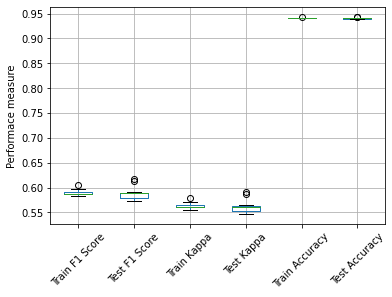

In [ ]:
# for high imbalance data

# seperating target and features
X = df_airline_90.drop(columns=['satisfaction'],axis=1)
y = df_airline_90['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
train_f1 = []
test_f1 = []
train_kappa = []
test_kappa = []
train_acc = []
test_acc = []
for train_index, test_index in skf.split(X, y):
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  x_train_fold_scale = pd.DataFrame(scale.fit_transform(x_train_fold), columns=x_train_fold.columns)
  x_test_fold_scale = pd.DataFrame(scale.transform(x_test_fold), columns=x_test_fold.columns)
  BL_Model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
  BL_Model.fit(x_train_fold_scale, y_train_fold)
  train_f1_cv = metrics.f1_score(y_train_fold, BL_Model.predict(x_train_fold_scale), pos_label='satisfied')
  test_f1_cv = metrics.f1_score(y_test_fold, BL_Model.predict(x_test_fold_scale), pos_label='satisfied')
  train_kappa_cv = metrics.cohen_kappa_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_kappa_cv = metrics.cohen_kappa_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  train_acc_cv = metrics.accuracy_score(y_train_fold, BL_Model.predict(x_train_fold_scale))#, pos_label='Yes')
  test_acc_cv = metrics.accuracy_score(y_test_fold, BL_Model.predict(x_test_fold_scale))#, pos_label='Yes')
  print('Iteration number:', iteration_no)
  train_f1 = np.append(train_f1, train_f1_cv)
  test_f1 = np.append(test_f1, test_f1_cv)
  train_kappa = np.append(train_kappa, train_kappa_cv)
  test_kappa = np.append(test_kappa, test_kappa_cv)
  train_acc = np.append(train_acc, train_acc_cv)
  test_acc = np.append(test_acc, test_acc_cv)
  iteration_no += 1
print('\nTrain F1 score after 10 fold CV:', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Test F1 score after 10 fold CV:', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
print('Train kappa after 10 fold CV:', round(train_kappa.mean(),5),'+/-', round(train_kappa.std(),5))
print('Test Kappa after 10 fold CV:', round(test_kappa.mean(),5),'+/-', round(test_kappa.std(),5))
print('Train Accuracy after 10 fold CV:', round(train_acc.mean(),5),'+/-', round(train_acc.std(),5))
print('Test Accuracy after 10 fold CV:', round(test_acc.mean(),5),'+/-', round(test_acc.std(),5))
print('')

# saving performance metrics for comparison
train_acc_BL_hig = train_acc
test_acc_BL_hig = test_acc
train_f1_BL_hig = train_f1
test_f1_BL_hig = test_f1
train_kappa_BL_hig = train_kappa
test_kappa_BL_hig = test_kappa

# visualising the performace metrics
visualise = {'Train F1 Score': train_f1, 'Test F1 Score': test_f1,
             'Train Kappa': train_kappa, 'Test Kappa': test_kappa,
             'Train Accuracy': train_acc, 'Test Accuracy': test_acc}
visualise = pd.DataFrame(visualise)
visualise.boxplot()
plt.ylabel('Performace measure')
plt.xticks(rotation=45)
plt.show()

**K-means clustering for original data**

In [ ]:
# configuring min max sacling
scale_minmax = MinMaxScaler()

# Encoding target variable, 1 for satisfied and 0 for other
df_airline['satisfaction'] = np.where(df_airline['satisfaction'] == 'neutral or dissatisfied', 0, df_airline['satisfaction'])
df_airline['satisfaction'] = np.where(df_airline['satisfaction'] == 'satisfied', 1, df_airline['satisfaction'])

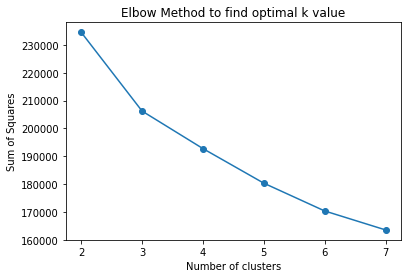

In [ ]:
# checking optimal value of k using elbow method
df_airline_scale = pd.DataFrame(scale_minmax.fit_transform(df_airline), columns=df_airline.columns)

# running k-means to find optimum k value

WSS = [] # creating empty list for appending Within sum of squares
K = range(2,8)
for k in K:
    k_means = KMeans(n_clusters=k,random_state=1)
    K_means_model = k_means.fit(df_airline_scale)
    WSS.append(K_means_model.inertia_)
plt.plot(K, WSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares')
plt.title('Elbow Method to find optimal k value')
plt.show()

2
3
4
5
6
7


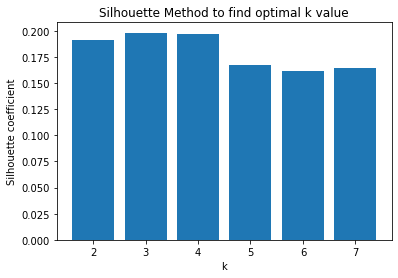

In [ ]:
# checking optimal value of k using silhoutte method
K = range(2,8)
No_of_clusters = []
Silhouette_scores = []

for k in K:
  k_means = KMeans(n_clusters=k,random_state=1)
  k_means.fit(df_airline_scale)
  preds = k_means.labels_
  centers = k_means.cluster_centers_
  sil_score = silhouette_score(df_airline_scale,preds)
  No_of_clusters.append(k)
  Silhouette_scores.append(sil_score)
  print(k)

plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Method to find optimal k value')
plt.bar(No_of_clusters,Silhouette_scores)
plt.show()

In [ ]:
df_airline['satisfaction'] = np.where(df_airline['satisfaction'] == 0, 'neutral or dissatisfied', df_airline['satisfaction'])
df_airline['satisfaction'] = np.where(df_airline['satisfaction'] == 1, 'satisfied', df_airline['satisfaction'])

In [ ]:
# for original data

# seperating target and features
X = df_airline.drop(columns=['satisfaction'],axis=1)
y = df_airline['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 0
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 0]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster0_org = train_f1
test_f1_cluster0_org = test_f1

**********Iteration Number 1**********
Silhouette score: 0.19824
Minority class samples: 17776
Train F1 0.68758
Test F1 0.52444
**********Iteration Number 2**********
Silhouette score: 0.19821
Minority class samples: 22650
Train F1 0.54017
Test F1 0.48119
**********Iteration Number 3**********
Silhouette score: 0.19847
Minority class samples: 16864
Train F1 0.36033
Test F1 0.33456
**********Iteration Number 4**********
Silhouette score: 0.19847
Minority class samples: 16857
Train F1 0.33411
Test F1 0.31733
**********Iteration Number 5**********
Silhouette score: 0.19806
Minority class samples: 17766
Train F1 0.68655
Test F1 0.51969
**********Iteration Number 6**********
Silhouette score: 0.19834
Minority class samples: 16826
Train F1 0.32853
Test F1 0.30409
**********Iteration Number 7**********
Silhouette score: 0.19822
Minority class samples: 22674
Train F1 0.50416
Test F1 0.47101
**********Iteration Number 8**********
Silhouette score: 0.19823
Minority class samples: 17713
Train F1 

In [ ]:
# for original data

# seperating target and features
X = df_airline.drop(columns=['satisfaction'],axis=1)
y = df_airline['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 1
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 1]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster1_org = train_f1
test_f1_cluster1_org = test_f1

**********Iteration Number 1**********
Silhouette score: 0.19824
Minority class samples: 16862
Train F1 0.34549
Test F1 0.34624
**********Iteration Number 2**********
Silhouette score: 0.19821
Minority class samples: 17721
Train F1 0.68773
Test F1 0.52454
**********Iteration Number 3**********
Silhouette score: 0.19847
Minority class samples: 22632
Train F1 0.51875
Test F1 0.50513
**********Iteration Number 4**********
Silhouette score: 0.19847
Minority class samples: 22708
Train F1 0.46832
Test F1 0.46389
**********Iteration Number 5**********
Silhouette score: 0.19806
Minority class samples: 22722
Train F1 0.44470
Test F1 0.46626
**********Iteration Number 6**********
Silhouette score: 0.19834
Minority class samples: 22636
Train F1 0.53708
Test F1 0.51184
**********Iteration Number 7**********
Silhouette score: 0.19822
Minority class samples: 16907
Train F1 0.34252
Test F1 0.32673
**********Iteration Number 8**********
Silhouette score: 0.19823
Minority class samples: 22639
Train F1 

In [ ]:
# for original data

# seperating target and features
X = df_airline.drop(columns=['satisfaction'],axis=1)
y = df_airline['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 2
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 2]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster2_org = train_f1
test_f1_cluster2_org = test_f1

**********Iteration Number 1**********
Silhouette score: 0.19824
Minority class samples: 22658
Train F1 0.50851
Test F1 0.47986
**********Iteration Number 2**********
Silhouette score: 0.19821
Minority class samples: 16834
Train F1 0.34078
Test F1 0.29363
**********Iteration Number 3**********
Silhouette score: 0.19847
Minority class samples: 17735
Train F1 0.69200
Test F1 0.52045
**********Iteration Number 4**********
Silhouette score: 0.19847
Minority class samples: 17732
Train F1 0.69237
Test F1 0.51963
**********Iteration Number 5**********
Silhouette score: 0.19806
Minority class samples: 16851
Train F1 0.34916
Test F1 0.33448
**********Iteration Number 6**********
Silhouette score: 0.19834
Minority class samples: 17755
Train F1 0.69015
Test F1 0.52631
**********Iteration Number 7**********
Silhouette score: 0.19822
Minority class samples: 17749
Train F1 0.68946
Test F1 0.52487
**********Iteration Number 8**********
Silhouette score: 0.19823
Minority class samples: 16880
Train F1 

**K-means clustering for low imbalance data**

In [ ]:
# configuring min max sacling
scale_minmax = MinMaxScaler()

# Encoding target variable, 1 for satisfied and 0 for other
df_airline_65['satisfaction'] = np.where(df_airline_65['satisfaction'] == 'neutral or dissatisfied', 0, df_airline_65['satisfaction'])
df_airline_65['satisfaction'] = np.where(df_airline_65['satisfaction'] == 'satisfied', 1, df_airline_65['satisfaction'])

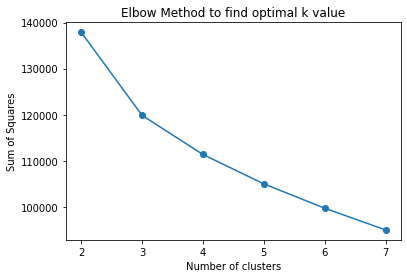

In [ ]:
# checking optimal value of k using elbow method
df_airline_scale = pd.DataFrame(scale_minmax.fit_transform(df_airline_65), columns=df_airline_65.columns)

# running k-means to find optimum k value

WSS = [] # creating empty list for appending Within sum of squares
K = range(2,8)
for k in K:
    k_means = KMeans(n_clusters=k,random_state=1)
    K_means_model = k_means.fit(df_airline_scale)
    WSS.append(K_means_model.inertia_)
plt.plot(K, WSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares')
plt.title('Elbow Method to find optimal k value')
plt.show()

2
3
4
5
6
7


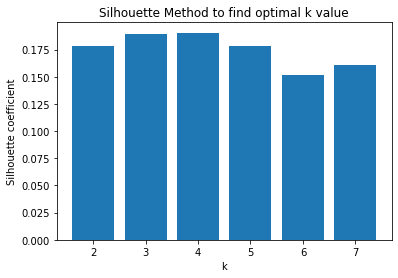

In [ ]:
# checking optimal value of k using silhoutte method
K = range(2,8)
No_of_clusters = []
Silhouette_scores = []

for k in K:
  k_means = KMeans(n_clusters=k,random_state=1)
  k_means.fit(df_airline_scale)
  preds = k_means.labels_
  centers = k_means.cluster_centers_
  sil_score = silhouette_score(df_airline_scale,preds)
  No_of_clusters.append(k)
  Silhouette_scores.append(sil_score)
  print(k)

plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Method to find optimal k value')
plt.bar(No_of_clusters,Silhouette_scores)
plt.show()

In [ ]:
df_airline_65['satisfaction'] = np.where(df_airline_65['satisfaction'] == 0, 'neutral or dissatisfied', df_airline_65['satisfaction'])
df_airline_65['satisfaction'] = np.where(df_airline_65['satisfaction'] == 1, 'satisfied', df_airline_65['satisfaction'])

In [ ]:
# for low imbalance data

# seperating target and features
X = df_airline_65.drop(columns=['satisfaction'],axis=1)
y = df_airline_65['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 0
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 0]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster0_low = train_f1
test_f1_cluster0_low = test_f1

**********Iteration Number 1**********
Silhouette score: 0.18905
Minority class samples: 10682
Train F1 0.33297
Test F1 0.30288
**********Iteration Number 2**********
Silhouette score: 0.18859
Minority class samples: 11213
Train F1 0.65930
Test F1 0.50545
**********Iteration Number 3**********
Silhouette score: 0.18526
Minority class samples: 10783
Train F1 0.33452
Test F1 0.31808
**********Iteration Number 4**********
Silhouette score: 0.18889
Minority class samples: 10718
Train F1 0.33378
Test F1 0.28523
**********Iteration Number 5**********
Silhouette score: 0.18903
Minority class samples: 10721
Train F1 0.32307
Test F1 0.32044
**********Iteration Number 6**********
Silhouette score: 0.18879
Minority class samples: 11264
Train F1 0.66606
Test F1 0.52038
**********Iteration Number 7**********
Silhouette score: 0.18911
Minority class samples: 10680
Train F1 0.32292
Test F1 0.31467
**********Iteration Number 8**********
Silhouette score: 0.18849
Minority class samples: 10690
Train F1 

In [ ]:
# for low imbalance data

# seperating target and features
X = df_airline_65.drop(columns=['satisfaction'],axis=1)
y = df_airline_65['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 1
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 1]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster1_low = train_f1
test_f1_cluster1_low = test_f1

**********Iteration Number 1**********
Silhouette score: 0.18905
Minority class samples: 10405
Train F1 0.50326
Test F1 0.45530
**********Iteration Number 2**********
Silhouette score: 0.18859
Minority class samples: 10764
Train F1 0.34149
Test F1 0.31494
**********Iteration Number 3**********
Silhouette score: 0.18526
Minority class samples: 10349
Train F1 0.49926
Test F1 0.40489
**********Iteration Number 4**********
Silhouette score: 0.18889
Minority class samples: 10384
Train F1 0.50651
Test F1 0.43544
**********Iteration Number 5**********
Silhouette score: 0.18903
Minority class samples: 10376
Train F1 0.49639
Test F1 0.44291
**********Iteration Number 6**********
Silhouette score: 0.18879
Minority class samples: 10363
Train F1 0.51144
Test F1 0.45701
**********Iteration Number 7**********
Silhouette score: 0.18911
Minority class samples: 11245
Train F1 0.67561
Test F1 0.53267
**********Iteration Number 8**********
Silhouette score: 0.18849
Minority class samples: 10383
Train F1 

In [ ]:
# for low imbalance data

# seperating target and features
X = df_airline_65.drop(columns=['satisfaction'],axis=1)
y = df_airline_65['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 2
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 2]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster2_low = train_f1
test_f1_cluster2_low = test_f1

**********Iteration Number 1**********
Silhouette score: 0.18905
Minority class samples: 11190
Train F1 0.66516
Test F1 0.53091
**********Iteration Number 2**********
Silhouette score: 0.18859
Minority class samples: 10355
Train F1 0.51468
Test F1 0.43560
**********Iteration Number 3**********
Silhouette score: 0.18526
Minority class samples: 11237
Train F1 0.66766
Test F1 0.53226
**********Iteration Number 4**********
Silhouette score: 0.18889
Minority class samples: 11270
Train F1 0.66998
Test F1 0.52734
**********Iteration Number 5**********
Silhouette score: 0.18903
Minority class samples: 11230
Train F1 0.66701
Test F1 0.52429
**********Iteration Number 6**********
Silhouette score: 0.18879
Minority class samples: 10692
Train F1 0.32955
Test F1 0.30710
**********Iteration Number 7**********
Silhouette score: 0.18911
Minority class samples: 10342
Train F1 0.53442
Test F1 0.46495
**********Iteration Number 8**********
Silhouette score: 0.18849
Minority class samples: 11173
Train F1 

**K-means clustering for medium imbalance data**

In [ ]:
# configuring min max sacling
scale_minmax = MinMaxScaler()

# Encoding target variable, 1 for satisfied and 0 for other
df_airline_75['satisfaction'] = np.where(df_airline_75['satisfaction'] == 'neutral or dissatisfied', 0, df_airline_75['satisfaction'])
df_airline_75['satisfaction'] = np.where(df_airline_75['satisfaction'] == 'satisfied', 1, df_airline_75['satisfaction'])

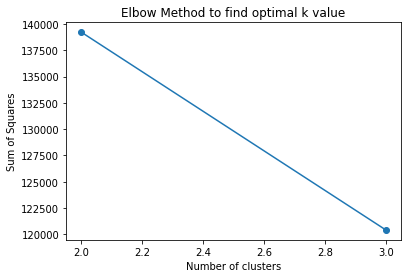

In [ ]:
# checking optimal value of k using elbow method
df_airline_scale = pd.DataFrame(scale_minmax.fit_transform(df_airline_75), columns=df_airline_75.columns)

# running k-means to find optimum k value

WSS = [] # creating empty list for appending Within sum of squares
K = range(2,4)#8)
for k in K:
    k_means = KMeans(n_clusters=k,random_state=1)
    K_means_model = k_means.fit(df_airline_scale)
    WSS.append(K_means_model.inertia_)
plt.plot(K, WSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares')
plt.title('Elbow Method to find optimal k value')
plt.show()

2
3
4
5
6
7


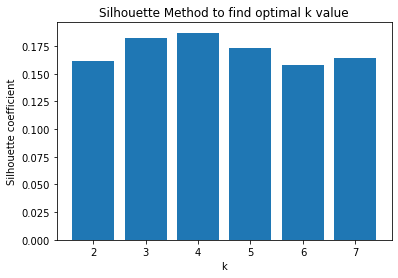

In [ ]:
# checking optimal value of k using silhoutte method
K = range(2,8)
No_of_clusters = []
Silhouette_scores = []

for k in K:
  k_means = KMeans(n_clusters=k,random_state=1)
  k_means.fit(df_airline_scale)
  preds = k_means.labels_
  centers = k_means.cluster_centers_
  sil_score = silhouette_score(df_airline_scale,preds)
  No_of_clusters.append(k)
  Silhouette_scores.append(sil_score)
  print(k)

plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Method to find optimal k value')
plt.bar(No_of_clusters,Silhouette_scores)
plt.show()

In [ ]:
df_airline_75['satisfaction'] = np.where(df_airline_75['satisfaction'] == 0, 'neutral or dissatisfied', df_airline_75['satisfaction'])
df_airline_75['satisfaction'] = np.where(df_airline_75['satisfaction'] == 1, 'satisfied', df_airline_75['satisfaction'])

In [ ]:
# for medium imbalance data

# seperating target and features
X = df_airline_75.drop(columns=['satisfaction'],axis=1)
y = df_airline_75['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 0
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 0]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster0_med = train_f1
test_f1_cluster0_med = test_f1

**********Iteration Number 1**********
Silhouette score: 0.18161
Minority class samples: 7420
Train F1 0.54253
Test F1 0.52806
**********Iteration Number 2**********
Silhouette score: 0.18172
Minority class samples: 12123
Train F1 0.32664
Test F1 0.32890
**********Iteration Number 3**********
Silhouette score: 0.18205
Minority class samples: 12125
Train F1 0.34393
Test F1 0.34400
**********Iteration Number 4**********
Silhouette score: 0.18215
Minority class samples: 12177
Train F1 0.34624
Test F1 0.36208
**********Iteration Number 5**********
Silhouette score: 0.18176
Minority class samples: 12118
Train F1 0.33589
Test F1 0.35361
**********Iteration Number 6**********
Silhouette score: 0.18186
Minority class samples: 12664
Train F1 0.67424
Test F1 0.56230
**********Iteration Number 7**********
Silhouette score: 0.18235
Minority class samples: 12623
Train F1 0.67669
Test F1 0.56957
**********Iteration Number 8**********
Silhouette score: 0.1819
Minority class samples: 7412
Train F1 0.5

In [ ]:
# for medium imbalance data

# seperating target and features
X = df_airline_75.drop(columns=['satisfaction'],axis=1)
y = df_airline_75['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 1
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 1]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster1_med = train_f1
test_f1_cluster1_med = test_f1

**********Iteration Number 1**********
Silhouette score: 0.18161
Minority class samples: 12167
Train F1 0.32641
Test F1 0.34072
**********Iteration Number 2**********
Silhouette score: 0.18172
Minority class samples: 12654
Train F1 0.68125
Test F1 0.56525
**********Iteration Number 3**********
Silhouette score: 0.18205
Minority class samples: 7434
Train F1 0.54543
Test F1 0.51467
**********Iteration Number 4**********
Silhouette score: 0.18215
Minority class samples: 12634
Train F1 0.67873
Test F1 0.56393
**********Iteration Number 5**********
Silhouette score: 0.18176
Minority class samples: 7438
Train F1 0.54325
Test F1 0.52458
**********Iteration Number 6**********
Silhouette score: 0.18186
Minority class samples: 12153
Train F1 0.34962
Test F1 0.35004
**********Iteration Number 7**********
Silhouette score: 0.18235
Minority class samples: 12186
Train F1 0.34604
Test F1 0.37109
**********Iteration Number 8**********
Silhouette score: 0.1819
Minority class samples: 12125
Train F1 0.3

In [ ]:
# for medium imbalance data

# seperating target and features
X = df_airline_75.drop(columns=['satisfaction'],axis=1)
y = df_airline_75['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 2
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 2]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster2_med = train_f1
test_f1_cluster2_med = test_f1

**********Iteration Number 1**********
Silhouette score: 0.18161
Minority class samples: 12626
Train F1 0.68149
Test F1 0.57588
**********Iteration Number 2**********
Silhouette score: 0.18172
Minority class samples: 7415
Train F1 0.54907
Test F1 0.50286
**********Iteration Number 3**********
Silhouette score: 0.18205
Minority class samples: 12645
Train F1 0.68302
Test F1 0.55483
**********Iteration Number 4**********
Silhouette score: 0.18215
Minority class samples: 7430
Train F1 0.54316
Test F1 0.47756
**********Iteration Number 5**********
Silhouette score: 0.18176
Minority class samples: 12593
Train F1 0.67868
Test F1 0.56167
**********Iteration Number 6**********
Silhouette score: 0.18186
Minority class samples: 7396
Train F1 0.55797
Test F1 0.50748
**********Iteration Number 7**********
Silhouette score: 0.18235
Minority class samples: 7452
Train F1 0.54613
Test F1 0.47512
**********Iteration Number 8**********
Silhouette score: 0.1819
Minority class samples: 12642
Train F1 0.680

**K-means clustering for high imbalance data**

In [ ]:
# configuring min max sacling
scale_minmax = MinMaxScaler()

# Encoding target variable, 1 for satisfied and 0 for other
df_airline_90['satisfaction'] = np.where(df_airline_90['satisfaction'] == 'neutral or dissatisfied', 0, df_airline_90['satisfaction'])
df_airline_90['satisfaction'] = np.where(df_airline_90['satisfaction'] == 'satisfied', 1, df_airline_90['satisfaction'])

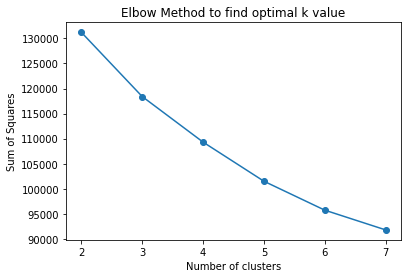

In [ ]:
# checking optimal value of k using elbow method
df_airline_scale = pd.DataFrame(scale_minmax.fit_transform(df_airline_90), columns=df_airline_90.columns)

# running k-means to find optimum k value

WSS = [] # creating empty list for appending Within sum of squares
K = range(2,8)
for k in K:
    k_means = KMeans(n_clusters=k,random_state=1)
    K_means_model = k_means.fit(df_airline_scale)
    WSS.append(K_means_model.inertia_)
plt.plot(K, WSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares')
plt.title('Elbow Method to find optimal k value')
plt.show()

2
3
4
5
6
7


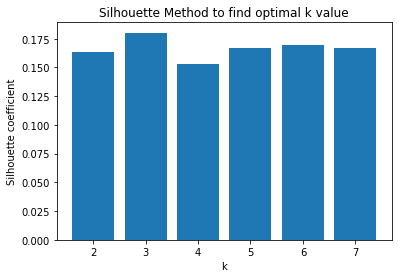

In [ ]:
# checking optimal value of k using silhoutte method
K = range(2,8)
No_of_clusters = []
Silhouette_scores = []

for k in K:
  k_means = KMeans(n_clusters=k,random_state=1)
  k_means.fit(df_airline_scale)
  preds = k_means.labels_
  centers = k_means.cluster_centers_
  sil_score = silhouette_score(df_airline_scale,preds)
  No_of_clusters.append(k)
  Silhouette_scores.append(sil_score)
  print(k)

plt.xlabel('k')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Method to find optimal k value')
plt.bar(No_of_clusters,Silhouette_scores)
plt.show()

In [ ]:
df_airline_90['satisfaction'] = np.where(df_airline_90['satisfaction'] == 0, 'neutral or dissatisfied', df_airline_90['satisfaction'])
df_airline_90['satisfaction'] = np.where(df_airline_90['satisfaction'] == 1, 'satisfied', df_airline_90['satisfaction'])

In [ ]:
# for high imbalance data

# seperating target and features
X = df_airline_90.drop(columns=['satisfaction'],axis=1)
y = df_airline_90['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 0
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 0]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster0_hig = train_f1
test_f1_cluster0_hig = test_f1

**********Iteration Number 1**********
Silhouette score: 0.17405
Minority class samples: 10630
Train F1 0.54394
Test F1 0.58520
**********Iteration Number 2**********
Silhouette score: 0.17989
Minority class samples: 10583
Train F1 0.52097
Test F1 0.58188
**********Iteration Number 3**********
Silhouette score: 0.18
Minority class samples: 6840
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 4**********
Silhouette score: 0.18018
Minority class samples: 10584
Train F1 0.52542
Test F1 0.58308
**********Iteration Number 5**********
Silhouette score: 0.18025
Minority class samples: 14705
Train F1 0.68129
Test F1 0.61017
**********Iteration Number 6**********
Silhouette score: 0.18026
Minority class samples: 6786
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 7**********
Silhouette score: 0.18019
Minority class samples: 6867
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 8**********
Silhouette score: 0.18027
Minority class samples: 14682
Train F1 0.6923

In [ ]:
# for high imbalance data

# seperating target and features
X = df_airline_90.drop(columns=['satisfaction'],axis=1)
y = df_airline_90['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 1
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 1]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster1_hig = train_f1
test_f1_cluster1_hig = test_f1

**********Iteration Number 1**********
Silhouette score: 0.17405
Minority class samples: 6843
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 2**********
Silhouette score: 0.17989
Minority class samples: 14722
Train F1 0.68507
Test F1 0.59967
**********Iteration Number 3**********
Silhouette score: 0.18
Minority class samples: 14735
Train F1 0.68497
Test F1 0.60740
**********Iteration Number 4**********
Silhouette score: 0.18018
Minority class samples: 14779
Train F1 0.68823
Test F1 0.61352
**********Iteration Number 5**********
Silhouette score: 0.18025
Minority class samples: 10618
Train F1 0.54636
Test F1 0.61220
**********Iteration Number 6**********
Silhouette score: 0.18026
Minority class samples: 14725
Train F1 0.68788
Test F1 0.60740
**********Iteration Number 7**********
Silhouette score: 0.18019
Minority class samples: 10611
Train F1 0.54281
Test F1 0.59055
**********Iteration Number 8**********
Silhouette score: 0.18027
Minority class samples: 10634
Train F1 0.53

In [ ]:
# for high imbalance data

# seperating target and features
X = df_airline_90.drop(columns=['satisfaction'],axis=1)
y = df_airline_90['satisfaction']

# performing 10 fold stratified cross validation
iteration_no = 1
minority_class_samples_save = []
centers_save = []
train_f1 = []
test_f1 = []
Silhouette_scores = []
for train_index, test_index in skf.split(X, y):
  print('**********Iteration Number {}**********'.format(iteration_no))
  x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
  y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
  df_train = x_train_fold.copy()
  test_data = x_test_fold.copy()
  test_data['satisfaction'] = y_test_fold 
  df_train['satisfaction'] = y_train_fold
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'neutral or dissatisfied', 0, df_train['satisfaction'])
  df_train['satisfaction'] = np.where(df_train['satisfaction'] == 'satisfied', 1, df_train['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'neutral or dissatisfied', 0, test_data['satisfaction'])
  test_data['satisfaction'] = np.where(test_data['satisfaction'] == 'satisfied', 1, test_data['satisfaction'])

  df_train_scale = pd.DataFrame(scale_minmax.fit_transform(df_train), columns = df_airline.columns) 
  km_3 = KMeans(n_clusters=3,random_state=1)    # k=3 clusters using elbow and silhouette method
  km_3.fit(df_train_scale)
  centers = km_3.cluster_centers_
  centers_save = np.append(centers_save, centers)
  Cluster_3 = km_3.labels_
  sil_score = silhouette_score(df_train_scale,Cluster_3)
  print('Silhouette score:', round(sil_score,5))
  Silhouette_scores.append(sil_score)
  df_airline_cluster = df_train_scale.copy()
  df_airline_cluster['Cluster'] = Cluster_3

  # for cluster label 2
  df_cluster0 = df_airline_cluster[df_airline_cluster['Cluster'] == 2]
  minority_class_samples = df_cluster0.satisfaction.value_counts().min()
  minority_class_samples_save = np.append(minority_class_samples_save, minority_class_samples)
  print('Minority class samples:',minority_class_samples)

  if minority_class_samples != 0:
    features = df_cluster0.drop(columns=['satisfaction'], axis=1)
    labels = df_cluster0['satisfaction']
    rf_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=4, min_samples_leaf=1000, min_samples_split=2, random_state=1)
    rf_model.fit(features, labels)
    #print('Train Data')
    train_f1_cv = metrics.f1_score(labels, rf_model.predict(features), pos_label=1)
    print('Train F1 {:.5f}'.format(train_f1_cv))
    train_f1 = np.append(train_f1, train_f1_cv)
    #print(metrics.classification_report(labels, rf_model.predict(features)))
  else:
    print('There are no samples of both classes, Hence classifier is not trained')

  test_data_scale = pd.DataFrame(scale_minmax.transform(test_data), columns = df_airline.columns)
  cluster_test_labels = km_3.fit_predict(test_data_scale)
  test_data_scale['Cluster'] = cluster_test_labels

  if minority_class_samples != 0:
    X_test = test_data_scale.drop(columns=['satisfaction'], axis=1)
    y_test = test_data_scale['satisfaction']
    #print('\nTest data')
    test_f1_cv = metrics.f1_score(y_test, rf_model.predict(X_test), pos_label=1)
    print('Test F1 {:.5f}'.format(test_f1_cv))
    test_f1 = np.append(test_f1, test_f1_cv)
    #print(metrics.classification_report(y_test, rf_model.predict(X_test)))
  else:
    print('There are no samples of both classes')
  iteration_no += 1
print('\nMinority class samples during each iterations', minority_class_samples_save)
print('Silhouette scores', round(np.mean(Silhouette_scores),5),'+/-', round(np.std(Silhouette_scores),5))
print('Overall train F1 score', round(train_f1.mean(),5),'+/-', round(train_f1.std(),5))
print('Overall test F1 score', round(test_f1.mean(),5),'+/-', round(test_f1.std(),5))
train_f1_cluster2_hig = train_f1
test_f1_cluster2_hig = test_f1

**********Iteration Number 1**********
Silhouette score: 0.17405
Minority class samples: 14705
Train F1 0.69169
Test F1 0.59376
**********Iteration Number 2**********
Silhouette score: 0.17989
Minority class samples: 6851
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 3**********
Silhouette score: 0.18
Minority class samples: 10615
Train F1 0.55158
Test F1 0.61045
**********Iteration Number 4**********
Silhouette score: 0.18018
Minority class samples: 6774
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 5**********
Silhouette score: 0.18025
Minority class samples: 6813
Train F1 0.00000
Test F1 0.00000
**********Iteration Number 6**********
Silhouette score: 0.18026
Minority class samples: 10670
Train F1 0.55040
Test F1 0.60876
**********Iteration Number 7**********
Silhouette score: 0.18019
Minority class samples: 14747
Train F1 0.68513
Test F1 0.59982
**********Iteration Number 8**********
Silhouette score: 0.18027
Minority class samples: 6807
Train F1 0.00000

**Comparison using permutation test**

In [ ]:
from numpy.random.mtrand import permutation
def get_pvalue(iterations,Results1,Results2,diff):
  concat = np.concatenate((Results1,Results2))
  count = 0
  for i in range(0,iterations):
    permutation = np.random.permutation(concat)
    p_current = permutation[:len(Results1)]
    p_new = permutation[len(Results1):]
    mean_permutation_current = p_current.mean()
    mean_permutation_new = p_new.mean()
    t_permutation = mean_permutation_new - mean_permutation_current

    if(t_permutation > diff):
      count += 1
  p_value = count / iterations
  if p_value > 0.05:
    print('Since p value {} is greater than 0.05 we failed to reject null hypothesis'.format(round(p_value,4)))
    #print('Results 1 are not better than Results 2')
  else:
    print('Since p value {} is less than 0.05 we will reject null hypothesis'.format(round(p_value,4)))
    #print('Results 1 are better than Results 2')
  return #p_value

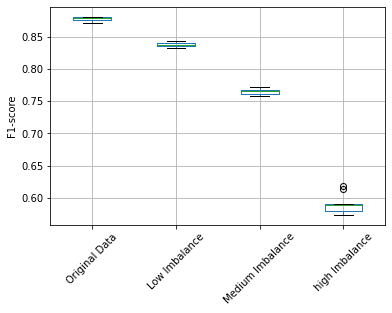

In [ ]:
# comaprison of baseline model for different imbalances
comparison = pd.concat([pd.Series(test_f1_BL_original), pd.Series(test_f1_BL_low), pd.Series(test_f1_BL_med), pd.Series(test_f1_BL_hig)], axis=1)
comparison.columns = ['Original Data', 'Low Imbalance', 'Medium Imbalance', 'high Imbalance']
comparison.boxplot()
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.show()

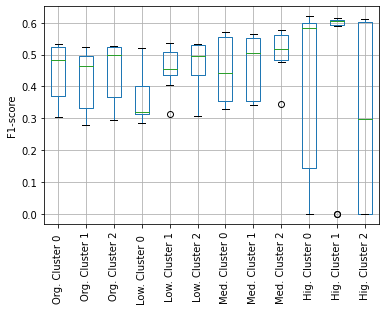

In [ ]:
# comaprison of custom model for different imbalances
comparison1 = pd.concat([pd.Series(test_f1_cluster0_org), pd.Series(test_f1_cluster1_org), pd.Series(test_f1_cluster2_org), pd.Series(test_f1_cluster0_low), pd.Series(test_f1_cluster1_low), pd.Series(test_f1_cluster2_low), pd.Series(test_f1_cluster0_med), pd.Series(test_f1_cluster1_med), pd.Series(test_f1_cluster2_med), pd.Series(test_f1_cluster0_hig), pd.Series(test_f1_cluster1_hig), pd.Series(test_f1_cluster2_hig)], axis=1)
comparison1.columns = ['Org. Cluster 0 ', 'Org. Cluster 1','Org. Cluster 2', 'Low. Cluster 0 ', 'Low. Cluster 1', 'Low. Cluster 2', 'Med. Cluster 0', 'Med. Cluster 1', 'Med. Cluster 2', 'Hig. Cluster 0', 'Hig. Cluster 1', 'Hig. Cluster 2']
comparison1.boxplot()
plt.ylabel('F1-score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
comparison

,Original Data,Low Imbalance,Medium Imbalance,high Imbalance
0,0.881583,0.837736,0.761331,0.590476
1,0.880074,0.837729,0.765931,0.613508
2,0.876182,0.837130,0.771338,0.579600
3,0.881315,0.837003,0.761051,0.588571
4,0.877076,0.839685,0.768203,0.578544
5,0.873722,0.843889,0.761421,0.617946
6,0.881393,0.832730,0.758643,0.588794
7,0.871861,0.842685,0.766613,0.587786
8,0.879452,0.842038,0.766950,0.575553
9,0.880250,0.835859,0.772120,0.573346


In [ ]:
comparison1

,Org. Cluster 0,Org. Cluster 1,Org. Cluster 2,Low. Cluster 0,Low. Cluster 1,Low. Cluster 2,Med. Cluster 0,Med. Cluster 1,Med. Cluster 2,Hig. Cluster 0,Hig. Cluster 1,Hig. Cluster 2
0,0.524442,0.346244,0.479865,0.302884,0.455301,0.530914,0.528057,0.340717,0.575882,0.585195,0.000000,0.593762
1,0.481187,0.524535,0.293630,0.505447,0.314944,0.435603,0.328900,0.565246,0.502863,0.581884,0.599673,0.000000
2,0.334560,0.505133,0.520447,0.318080,0.404895,0.532258,0.343997,0.514671,0.554834,0.000000,0.607402,0.610455
3,0.317331,0.463889,0.519627,0.285230,0.435443,0.527339,0.362082,0.563931,0.477564,0.583084,0.613516,0.000000
4,0.519693,0.466263,0.334480,0.320440,0.442907,0.524294,0.353606,0.524578,0.561673,0.610165,0.612199,0.000000
5,0.304089,0.511841,0.526307,0.520379,0.457005,0.307099,0.562296,0.350040,0.507481,0.000000,0.607404,0.608761
6,0.471008,0.326728,0.524868,0.314667,0.532667,0.464946,0.569566,0.371086,0.475117,0.000000,0.590548,0.599822
7,0.527658,0.472448,0.340987,0.312936,0.458049,0.531684,0.523156,0.343801,0.569056,0.620208,0.610021,0.000000
8,0.533572,0.278221,0.449832,0.424863,0.536016,0.311942,0.352754,0.562690,0.528181,0.579548,0.000000,0.604955
9,0.482393,0.312629,0.527311,0.324892,0.526241,0.435366,0.564439,0.494859,0.344282,0.602352,0.603241,0.000000


**Comparison between base and custom models**

In [ ]:
# original data comparison base line Vs custo model
diff = test_f1_BL_original.mean() - test_f1_cluster0_org.mean()    #for cluster 0
get_pvalue(10000, test_f1_BL_original, test_f1_cluster0_org, diff)

diff = test_f1_BL_original.mean() - test_f1_cluster1_org.mean()    #for cluster 1
get_pvalue(10000, test_f1_BL_original, test_f1_cluster1_org, diff)

diff = test_f1_BL_original.mean() - test_f1_cluster2_org.mean()    #for cluster 2
get_pvalue(10000, test_f1_BL_original, test_f1_cluster2_org, diff)

Since p value 0.0 is less than 0.05 we will reject null hypothesis
Since p value 0.0 is less than 0.05 we will reject null hypothesis
Since p value 0.0 is less than 0.05 we will reject null hypothesis


In [ ]:
# low data imbalance comparison base line Vs custo model
diff = test_f1_BL_low.mean() - test_f1_cluster0_low.mean()    #for cluster 0
get_pvalue(10000, test_f1_BL_low, test_f1_cluster0_low, diff)

diff = test_f1_BL_low.mean() - test_f1_cluster1_low.mean()    #for cluster 1
get_pvalue(10000, test_f1_BL_low, test_f1_cluster1_low, diff)

diff = test_f1_BL_low.mean() - test_f1_cluster2_low.mean()    #for cluster 2
get_pvalue(10000, test_f1_BL_low, test_f1_cluster2_low, diff)

Since p value 0.0 is less than 0.05 we will reject null hypothesis
Since p value 0.0 is less than 0.05 we will reject null hypothesis
Since p value 0.0 is less than 0.05 we will reject null hypothesis


In [ ]:
# Medium data imbalance comparison base line Vs custo model
diff = test_f1_BL_med.mean() - test_f1_cluster0_med.mean()    #for cluster 0
get_pvalue(10000, test_f1_BL_med, test_f1_cluster0_med, diff)

diff = test_f1_BL_med.mean() - test_f1_cluster1_med.mean()    #for cluster 1
get_pvalue(10000, test_f1_BL_med, test_f1_cluster1_med, diff)

diff = test_f1_BL_med.mean() - test_f1_cluster2_med.mean()    #for cluster 2
get_pvalue(10000, test_f1_BL_med, test_f1_cluster2_med, diff)

Since p value 0.0 is less than 0.05 we will reject null hypothesis
Since p value 0.0 is less than 0.05 we will reject null hypothesis
Since p value 0.0 is less than 0.05 we will reject null hypothesis


In [ ]:
# High data imbalance comparison base line Vs custo model
diff = test_f1_BL_hig.mean() - test_f1_cluster0_hig.mean()    #for cluster 0
get_pvalue(10000, test_f1_BL_hig, test_f1_cluster0_hig, diff)

diff = test_f1_BL_hig.mean() - test_f1_cluster1_hig.mean()    #for cluster 1
get_pvalue(10000, test_f1_BL_hig, test_f1_cluster1_hig, diff)

diff = test_f1_BL_hig.mean() - test_f1_cluster2_hig.mean()    #for cluster 2
get_pvalue(10000, test_f1_BL_hig, test_f1_cluster2_hig, diff)

Since p value 0.0787 is greater than 0.05 we failed to reject null hypothesis
Since p value 0.2377 is greater than 0.05 we failed to reject null hypothesis
Since p value 0.016 is less than 0.05 we will reject null hypothesis
